# Sentiment analysis

In [1]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

In [2]:
df=pd.read_csv("train.csv")


In [3]:
df.head()

,ID,Place,location,date,status,job_title,summary,positives,negatives,advice_to_mgmt,score_1,score_2,score_3,score_4,score_5,score_6,overall
0,1,startup_1,NaN,"Dec 11, 2018",Current Employee,Anonymous Employee,Best Company to work for,People are smart and friendly,Bureaucracy is slowing things down,NaN,4.0,5.0,5.0,4.0,5.0,0,5.0
1,2,startup_1,"Mountain View, CA","Jun 21, 2013",Former Employee,Program Manager,"Moving at the speed of light, burn out is inev...","1) Food, food, food. 15+ cafes on main campus ...",1) Work/life balance. What balance? All those ...,1) Don't dismiss emotional intelligence and ad...,2.0,3.0,3.0,5.0,3.0,2094,5.0
2,3,startup_1,"New York, NY","May 10, 2014",Current Employee,Software Engineer III,Great balance between big-company security and...,"* If you're a software engineer, you're among ...","* It *is* becoming larger, and with it comes g...",Keep the focus on the user. Everything else wi...,5.0,4.0,5.0,5.0,4.0,949,5.0
3,4,startup_1,"Mountain View, CA","Feb 8, 2015",Current Employee,Anonymous Employee,The best place I've worked and also the most d...,You can't find a more well-regarded company th...,I live in SF so the commute can take between 1...,Keep on NOT micromanaging - that is a huge ben...,2.0,5.0,5.0,4.0,5.0,498,4.0
4,10,startup_1,NaN,"Dec 9, 2018",Current Employee,Anonymous Employee,Execellent for engineers,Impact driven. Best tech in the world.,Size matters. Engineers are a bit disconnected...,NaN,5.0,5.0,5.0,5.0,5.0,0,4.0


In [4]:
df.shape


(30336, 17)

In [5]:
df_clean=df.drop(['ID','Place','location','date','status','job_title','summary','advice_to_mgmt','score_1','score_2','score_3','score_4','score_5','score_6','overall'],axis=1)
df_postitives=df_clean.drop(['negatives'],axis=1)

df_postitives=df_postitives.head(n=1000)

df_negatives=df_clean.drop(['positives'],axis=1)

df_negatives=df_negatives.head(n=1000)

df_postitives['polarity']=1
#dftive_postis['polarity']=1
df_negatives['polarity']=0
df_postitives.columns=['value','polarity']
df_negatives.columns=['value','polarity']
frames=[df_postitives,df_negatives]
df=pd.concat(frames)

In [6]:
df_postitives


,value,polarity
0,People are smart and friendly,1
1,"1) Food, food, food. 15+ cafes on main campus ...",1
2,"* If you're a software engineer, you're among ...",1
3,You can't find a more well-regarded company th...,1
4,Impact driven. Best tech in the world.,1
...,...,...
995,"Very impactful work, great coworkers, good wor...",1
996,"Smart co-workers, challenging problems, great ...",1
997,"Competitive co-workers, freedom to do whatever...",1
998,Nice perks means a cool environment,1


In [7]:
type(df_postitives)

pandas.core.frame.DataFrame

In [8]:
type(df_postitives['value'][2])

str

In [9]:
df_to_list=df_postitives['value'].values.tolist()

In [10]:
df_to_list0=df_to_list #positives

In [11]:
df_to_list1=df_negatives['value'].values.tolist()

In [12]:
type(df_to_list)

list

In [13]:
vectorizer=TfidfVectorizer(max_features=1000)
vectors=vectorizer.fit_transform(df.value)
word_df=pd.DataFrame(vectors.toarray(),columns=vectorizer.get_feature_names())
word_df.head()

,000,10,20,401k,50,ability,able,about,above,absolutely,...,writing,written,wrong,year,years,yet,you,young,your,yourself
0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,...,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000
1,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,...,0.0,0.0,0.000000,0.0,0.000000,0.0,0.091675,0.0,0.059812,0.000000
2,0.0,0.0,0.0,0.0,0.0,0.0,0.030894,0.020882,0.0,0.029999,...,0.0,0.0,0.000000,0.0,0.023973,0.0,0.355245,0.0,0.038629,0.033399
3,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.099726,0.0,0.000000,...,0.0,0.0,0.048435,0.0,0.000000,0.0,0.541944,0.0,0.184478,0.000000
4,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,...,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000


In [14]:
X=word_df
y=df.polarity

In [15]:
X

,000,10,20,401k,50,ability,able,about,above,absolutely,...,writing,written,wrong,year,years,yet,you,young,your,yourself
0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,...,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000
1,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,...,0.0,0.0,0.000000,0.0,0.000000,0.0,0.091675,0.0,0.059812,0.000000
2,0.0,0.0,0.0,0.0,0.0,0.0,0.030894,0.020882,0.0,0.029999,...,0.0,0.0,0.000000,0.0,0.023973,0.0,0.355245,0.0,0.038629,0.033399
3,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.099726,0.0,0.000000,...,0.0,0.0,0.048435,0.0,0.000000,0.0,0.541944,0.0,0.184478,0.000000
4,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,...,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,...,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000
1996,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,...,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000
1997,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,...,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000
1998,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,...,0.0,0.0,0.000000,0.0,0.000000,0.0,0.275094,0.0,0.000000,0.000000


In [16]:
X

,000,10,20,401k,50,ability,able,about,above,absolutely,...,writing,written,wrong,year,years,yet,you,young,your,yourself
0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,...,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000
1,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,...,0.0,0.0,0.000000,0.0,0.000000,0.0,0.091675,0.0,0.059812,0.000000
2,0.0,0.0,0.0,0.0,0.0,0.0,0.030894,0.020882,0.0,0.029999,...,0.0,0.0,0.000000,0.0,0.023973,0.0,0.355245,0.0,0.038629,0.033399
3,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.099726,0.0,0.000000,...,0.0,0.0,0.048435,0.0,0.000000,0.0,0.541944,0.0,0.184478,0.000000
4,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,...,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,...,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000
1996,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,...,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000
1997,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,...,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000
1998,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,...,0.0,0.0,0.000000,0.0,0.000000,0.0,0.275094,0.0,0.000000,0.000000


In [17]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB

In [18]:
# logistic regression model
logreg = LogisticRegression(C=1e9, solver='lbfgs', max_iter=1000)
logreg.fit(X, y)

LogisticRegression(C=1000000000.0, max_iter=1000)

# Testing


In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.33, random_state=12)


In [20]:
# logistic regression model
logreg1 = LogisticRegression(C=1e9, solver='lbfgs', max_iter=1000)
logreg1.fit(X_train, y_train)
svc1=LinearSVC()
svc1.fit(X_train,y_train)

LinearSVC()

In [21]:
y_pred= logreg1.predict(X_test)
y_pred2=svc1.predict(X_test)

In [22]:
y_test

369    1
342    0
520    1
636    0
982    0
      ..
653    1
91     0
438    0
272    1
560    1
Name: polarity, Length: 660, dtype: int64

In [23]:
from sklearn.metrics import confusion_matrix
import matplotlib as plt
cm= confusion_matrix(y_test,y_pred)
print(cm)


[[291  25]
 [ 42 302]]


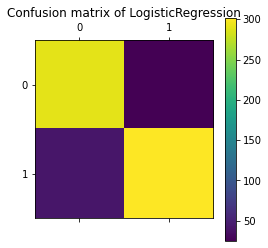

In [24]:
import pylab as pl 
pl.matshow(cm)
pl.title('Confusion matrix of LogisticRegression')
pl.colorbar()
pl.show()


In [25]:
cm_svc= confusion_matrix(y_test,y_pred2)
print(cm_svc)

[[293  23]
 [ 40 304]]


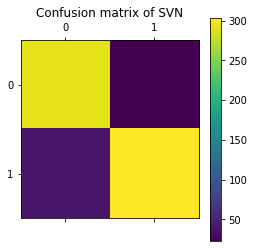

In [26]:
import pylab as pl 
pl.matshow(cm_svc)
pl.title('Confusion matrix of SVN')
pl.colorbar()
pl.show()



## End of testing

In [27]:
svc=LinearSVC()
svc.fit(X,y)

LinearSVC()

In [28]:
unknown = pd.DataFrame({'content': [
    "office space is big",

    "excellent manager",
    "low salary",
    "good career opportunity",
    "office politics",
    "inefficient leadership",
    "canteen food is good but service is bad",
    "cantenn food is good"
    "food taste bad"

]})

In [29]:
unknown_vectors = vectorizer.transform(unknown.content)
unknown_words_df = pd.DataFrame(unknown_vectors.toarray(), columns=vectorizer.get_feature_names())
unknown_words_df.head()

,000,10,20,401k,50,ability,able,about,above,absolutely,...,writing,written,wrong,year,years,yet,you,young,your,yourself
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [30]:
unknown['pred_logreg'] = logreg.predict(unknown_words_df)

In [31]:
unknown

,content,pred_logreg
0,office space is big,0
1,excellent manager,1
2,low salary,0
3,good career opportunity,1
4,office politics,1
5,inefficient leadership,0
6,canteen food is good but service is bad,0
7,cantenn food is goodfood taste bad,0


In [32]:
unknown.pred_logreg[0]


0

In [33]:
df_review = df_postitives

In [34]:
df_review=df_postitives["value"]+df_negatives['value']

In [35]:
df_review

0      People are smart and friendlyBureaucracy is sl...
1      1) Food, food, food. 15+ cafes on main campus ...
2      * If you're a software engineer, you're among ...
3      You can't find a more well-regarded company th...
4      Impact driven. Best tech in the world.Size mat...
                             ...                        
995    Very impactful work, great coworkers, good wor...
996    Smart co-workers, challenging problems, great ...
997    Competitive co-workers, freedom to do whatever...
998    Nice perks means a cool environmentRemote offi...
999    + Awesome projects + Lots of learning + Great ...
Name: value, Length: 1000, dtype: object

In [36]:
df1=pd.read_csv("train.csv")

In [37]:
df1_overall=df1.drop(['ID','Place','location','date','status','job_title','summary','advice_to_mgmt','score_1','score_2','score_3','score_4','score_5','score_6'],axis=1)

In [38]:
df1_overall["review"] = df1_overall["positives"] + df1_overall["negatives"]

In [39]:
df1_overall.drop(['positives','negatives'],axis=1)

,overall,review
0,5.0,People are smart and friendlyBureaucracy is sl...
1,5.0,"1) Food, food, food. 15+ cafes on main campus ..."
2,5.0,"* If you're a software engineer, you're among ..."
3,4.0,You can't find a more well-regarded company th...
4,4.0,Impact driven. Best tech in the world.Size mat...
...,...,...
30331,2.0,MS is a good company but hire wrong people. Wo...
30332,4.0,"Good benefits package, huge customer base.Poli..."
30333,3.0,"-Access to a wide range of technologies, compl..."
30334,4.0,Nice place to work. Good atmosphere with advan...


In [40]:
vectorizer=TfidfVectorizer(max_features=1000)
vectors=vectorizer.fit_transform(df1_overall.review)
wordreview_df=pd.DataFrame(vectors.toarray(),columns=vectorizer.get_feature_names())
wordreview_df.head()

,10,100,12,15,20,30,40,401k,50,60,...,wrong,year,years,yes,yet,you,young,your,yourself,zero
0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0
1,0.0,0.0,0.0,0.043924,0.0,0.000000,0.000000,0.0,0.0,0.0,...,0.000000,0.000000,0.031077,0.000000,0.041849,0.094438,0.0,0.020737,0.000000,0.0
2,0.0,0.0,0.0,0.000000,0.0,0.000000,0.064798,0.0,0.0,0.0,...,0.000000,0.000000,0.042986,0.033234,0.000000,0.261255,0.0,0.028684,0.026601,0.0
3,0.0,0.0,0.0,0.000000,0.0,0.027153,0.000000,0.0,0.0,0.0,...,0.026157,0.040333,0.018507,0.000000,0.000000,0.478033,0.0,0.197589,0.000000,0.0
4,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0


In [41]:
XX=wordreview_df.head(n=1000)
yy=df1_overall.overall.head(n=1000)

In [42]:
yy.head

<bound method NDFrame.head of 0      5.0
1      5.0
2      5.0
3      4.0
4      4.0
      ... 
995    4.0
996    4.0
997    3.0
998    4.0
999    4.0
Name: overall, Length: 1000, dtype: float64>

In [43]:
logreg1 = LogisticRegression(C=1e9, solver='lbfgs', max_iter=1000)
logreg1.fit(XX, yy)

LogisticRegression(C=1000000000.0, max_iter=1000)

In [44]:
unknown = pd.DataFrame({'content': [
    "office space is big",

    "excellent manager but lack of job security",
    "low salary however job security is high",
    "good career opportunity low salay",
    "office politics",
    "inefficient leadership",
    "canteen food is good but service is bad",
    "cantenn food is good"
    "food taste bad"

]})

In [45]:
unknown_vectors = vectorizer.transform(unknown.content)
unknown_words_df = pd.DataFrame(unknown_vectors.toarray(), columns=vectorizer.get_feature_names())
unknown_words_df.head()

,10,100,12,15,20,30,40,401k,50,60,...,wrong,year,years,yes,yet,you,young,your,yourself,zero
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [46]:
unknown['pred_logreg'] = logreg1.predict(unknown_words_df)

In [47]:
unknown

,content,pred_logreg
0,office space is big,5.0
1,excellent manager but lack of job security,4.0
2,low salary however job security is high,4.0
3,good career opportunity low salay,5.0
4,office politics,3.0
5,inefficient leadership,4.0
6,canteen food is good but service is bad,5.0
7,cantenn food is goodfood taste bad,5.0


# LDA


In [48]:
df_to_list=df_to_list0 # df_to_list1  == negatives comments
#df_to_list0 == positives comments

In [49]:
from time import time
import matplotlib.pyplot as plt 

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import NMF, LatentDirichletAllocation
from sklearn.datasets import fetch_20newsgroups

n_samples = 2000
n_features = 1000
n_components = 10
n_top_words = 10

In [50]:
def plot_top_words(model, feature_names, n_top_words, title):
    fig, axes = plt.subplots(2, 5, figsize=(30, 15), sharex=True)
    axes = axes.flatten()
    for topic_idx, topic in enumerate(model.components_):
        top_features_ind = topic.argsort()[:-n_top_words - 1:-1]
        top_features = [feature_names[i] for i in top_features_ind]
        print(top_features)
        weights = topic[top_features_ind]

        ax = axes[topic_idx]
        ax.barh(top_features, weights, height=0.7)
        ax.set_title(f'Topic {topic_idx +1}',
                     fontdict={'fontsize': 30})
        ax.invert_yaxis()
        ax.tick_params(axis='both', which='major', labelsize=20)
        for i in 'top right left'.split():
            ax.spines[i].set_visible(False)
        fig.suptitle(title, fontsize=40)

    plt.subplots_adjust(top=0.90, bottom=0.05, wspace=0.90, hspace=0.3)
    plt.show()

In [51]:
tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=2,
                                   max_features=n_features,
                                   stop_words='english')

In [52]:
tfidf = tfidf_vectorizer.fit_transform(df_to_list)

In [53]:
tf_vectorizer = CountVectorizer(max_df=0.95, min_df=2,
                                max_features=n_features,
                                stop_words='english')

In [54]:
individual=[df_to_list[2],df_to_list[3],df_to_list[11]]  #,df_to_list[3],df_to_list[4],df_to_list[5],df_to_list[6],df_to_list[7],df_to_list[8],df_to_list[9],df_to_list[10],df_to_list[11]
tf = tf_vectorizer.fit_transform(individual)  # df_to_list

In [55]:
for i in range(len(individual)):
    print(df_to_list[i])
    print("=============")

People are smart and friendly
1) Food, food, food. 15+ cafes on main campus (MTV) alone. Mini-kitchens, snacks, drinks, free breakfast/lunch/dinner, all day, errr'day.  2) Benefits/perks. Free 24:7 gym access (on MTV campus). Free (self service) laundry (washer/dryer) available. Bowling alley. Volley ball pit. Custom-built and exclusive employee use only outdoor sport park (MTV). Free health/fitness assessments. Dog-friendly. Etc. etc. etc.  3) Compensation. In ~2010 or 2011, Google updated its compensation packages so that they were more competitive.  4) For the size of the organization (30K+), it has remained relatively innovative, nimble, and fast-paced and open with communication but, that is definitely changing (for the worse).  5) With so many departments, focus areas, and products, *in theory*, you should have plenty of opportunity to grow your career (horizontally or vertically). In practice, not true.  6) You get to work with some of the brightest, most innovative and hard-wor

In [56]:
type(individual)

list

In [57]:
tf
print(tf)

  (0, 10)	5
  (0, 2)	6
  (0, 9)	1
  (0, 5)	1
  (0, 23)	1
  (0, 21)	2
  (0, 30)	1
  (0, 6)	2
  (0, 18)	3
  (0, 13)	1
  (0, 22)	1
  (0, 25)	1
  (0, 8)	1
  (0, 1)	1
  (0, 7)	1
  (0, 3)	2
  (0, 26)	1
  (0, 16)	4
  (0, 29)	1
  (0, 19)	3
  (0, 15)	3
  (0, 4)	2
  (0, 28)	2
  (0, 24)	2
  (0, 11)	1
  :	:
  (1, 30)	1
  (1, 18)	1
  (1, 13)	1
  (1, 22)	1
  (1, 25)	1
  (1, 8)	1
  (1, 1)	1
  (1, 7)	2
  (1, 3)	1
  (1, 26)	1
  (1, 16)	9
  (1, 29)	1
  (1, 19)	2
  (1, 15)	2
  (1, 4)	1
  (1, 28)	1
  (1, 24)	1
  (1, 11)	1
  (1, 12)	1
  (1, 0)	1
  (1, 17)	1
  (1, 14)	1
  (1, 20)	1
  (1, 27)	1
  (2, 6)	1


In [58]:
nmf = NMF(n_components=n_components, random_state=1,
          alpha=.1, l1_ratio=.5).fit(tfidf)

['great', 'people', 'atmosphere', 'flexibility', 'flexible', 'fantastic', 'opportunities', 'food', 'care', 'workers']
['good', 'pay', 'salary', 'people', 'pretty', 'food', 'job', 'money', 'experience', 'times']
['place', 'work', 'google', 'nice', 'fun', 'best', 'amazing', 'terrific', 'grow', 'loved']
['people', 'smart', 'work', 'amazing', 'working', 'awesome', 'nice', 'challenging', 'lots', 'really']
['food', 'free', 'gym', 'nice', 'really', 'google', 'lot', 'snacks', '401k', 'wonderful']
['company', 'work', 'best', 'google', 'world', 'large', 'culture', 'growth', 'big', 'need']
['environment', 'work', 'fun', 'friendly', 'working', 'best', 'perks', 'flexible', 'awesome', 'excellent']
['life', 'balance', 'work', 'interesting', 'projects', 'peers', 'opportunities', 'home', 'excellent', 'provides']
['benefits', 'pay', 'lots', 'salary', 'excellent', 'fantastic', 'amazing', 'compensation', 'opportunities', 'interesting']
['perks', 'culture', 'awesome', 'opportunities', 'colleagues', 'team',

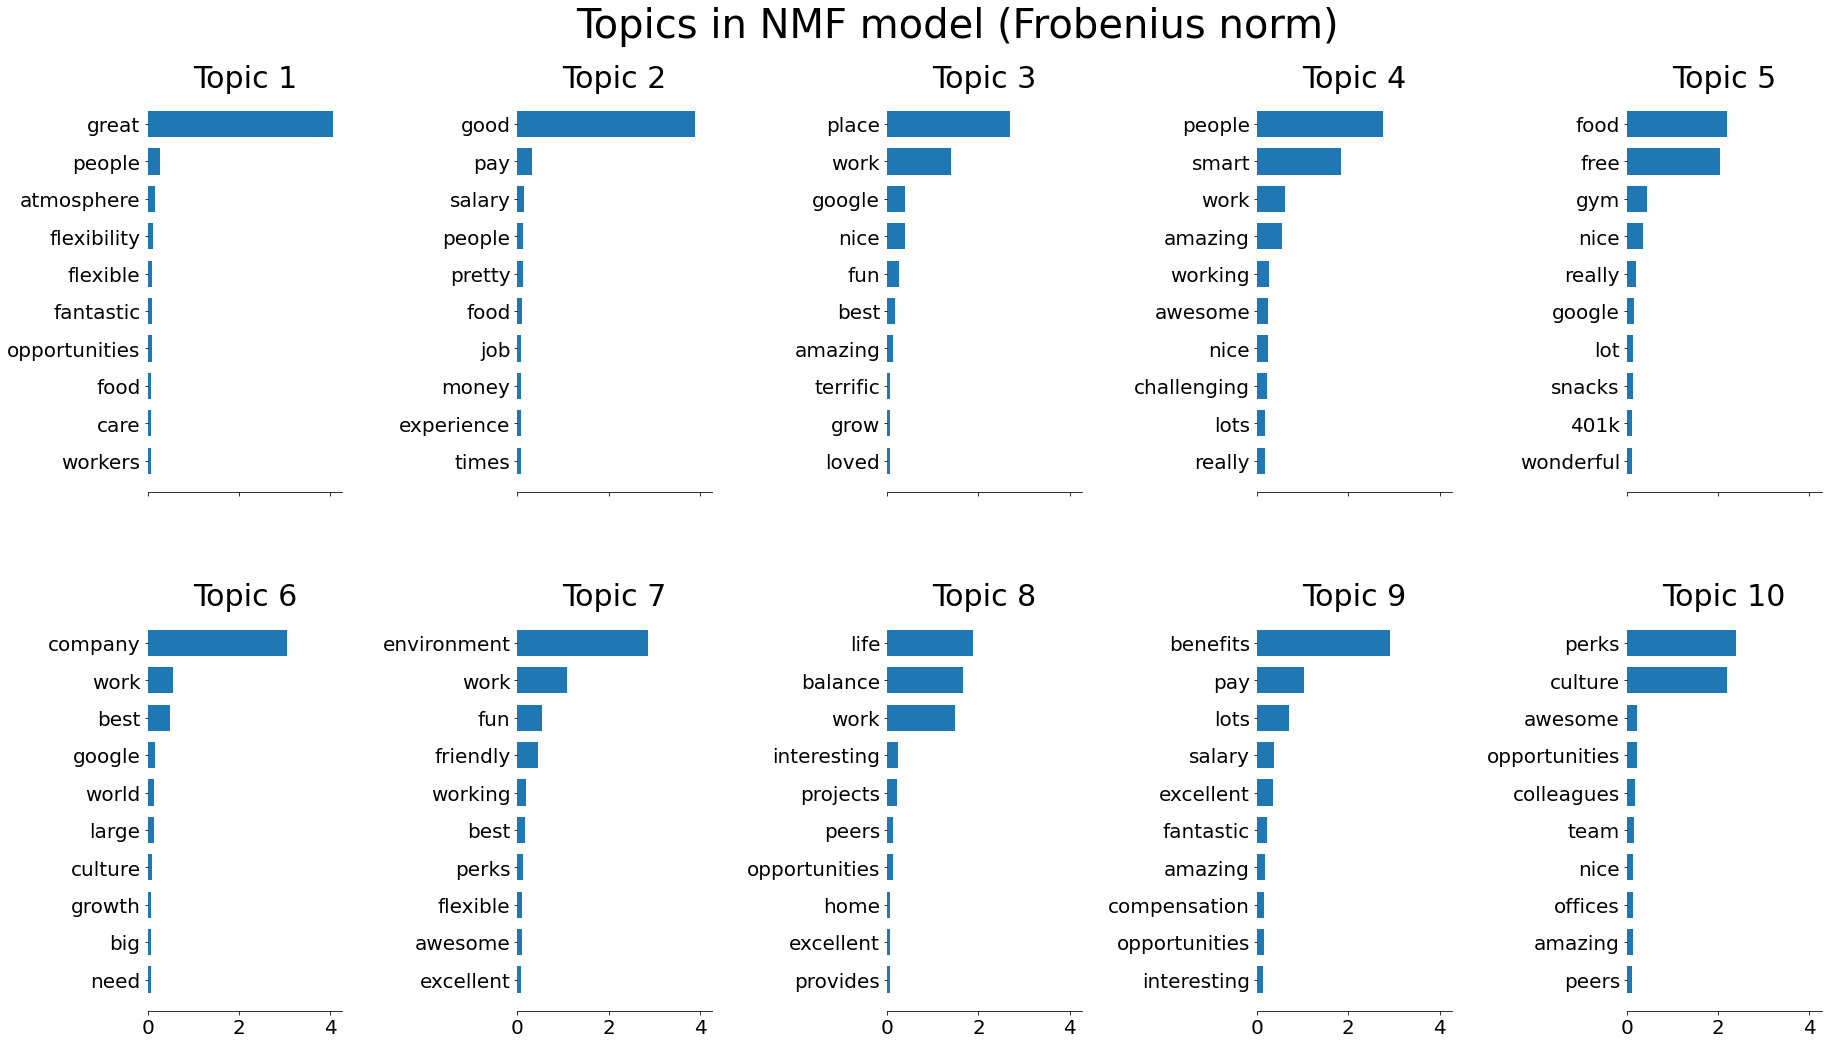

In [59]:
tfidf_feature_names = tfidf_vectorizer.get_feature_names()
plot_top_words(nmf, tfidf_feature_names, n_top_words,
               'Topics in NMF model (Frobenius norm)')

In [60]:
nmf

NMF(alpha=0.1, l1_ratio=0.5, n_components=10, random_state=1)

In [61]:
nmf = NMF(n_components=n_components, random_state=1,
          beta_loss='kullback-leibler', solver='mu', max_iter=1000, alpha=.1,
          l1_ratio=.5).fit(tfidf)

In [62]:
enumerate(nmf.components_)

In [63]:
n_top_words

10

['great', 'people', 'benefits', 'culture', 'perks', 'smart', 'fantastic', 'atmosphere', 'workers', 'team']
['good', 'pay', 'salary', 'pretty', 'money', 'experience', 'pros', 'stock', 'perk', 'hard']
['work', 'place', 'best', 'google', 'fun', 'job', 'places', 'dynamic', 'range', 'energy']
['people', 'smart', 'nice', 'amazing', 'really', 'lot', 'learn', 'work', 'challenging', 'opportunity']
['food', 'free', 'really', 'gym', 'like', 'nice', 'cool', 'campus', 'google', 'lunch']
['company', 'world', 'best', 'problems', 'tech', 'big', 'people', 'working', 'things', 'google']
['environment', 'friendly', 'working', 'great', 'fun', 'flexible', 'awesome', 'time', 'staff', 'technology']
['work', 'life', 'balance', 'projects', 'interesting', 'opportunities', 'colleagues', 'peers', 'flexible', 'hours']
['benefits', 'lots', 'excellent', 'pay', 'amazing', 'competitive', 'compensation', 'easy', 'love', 'time']
['perks', 'culture', 'awesome', 'opportunities', 'google', 'employees', 'learning', 'way', '

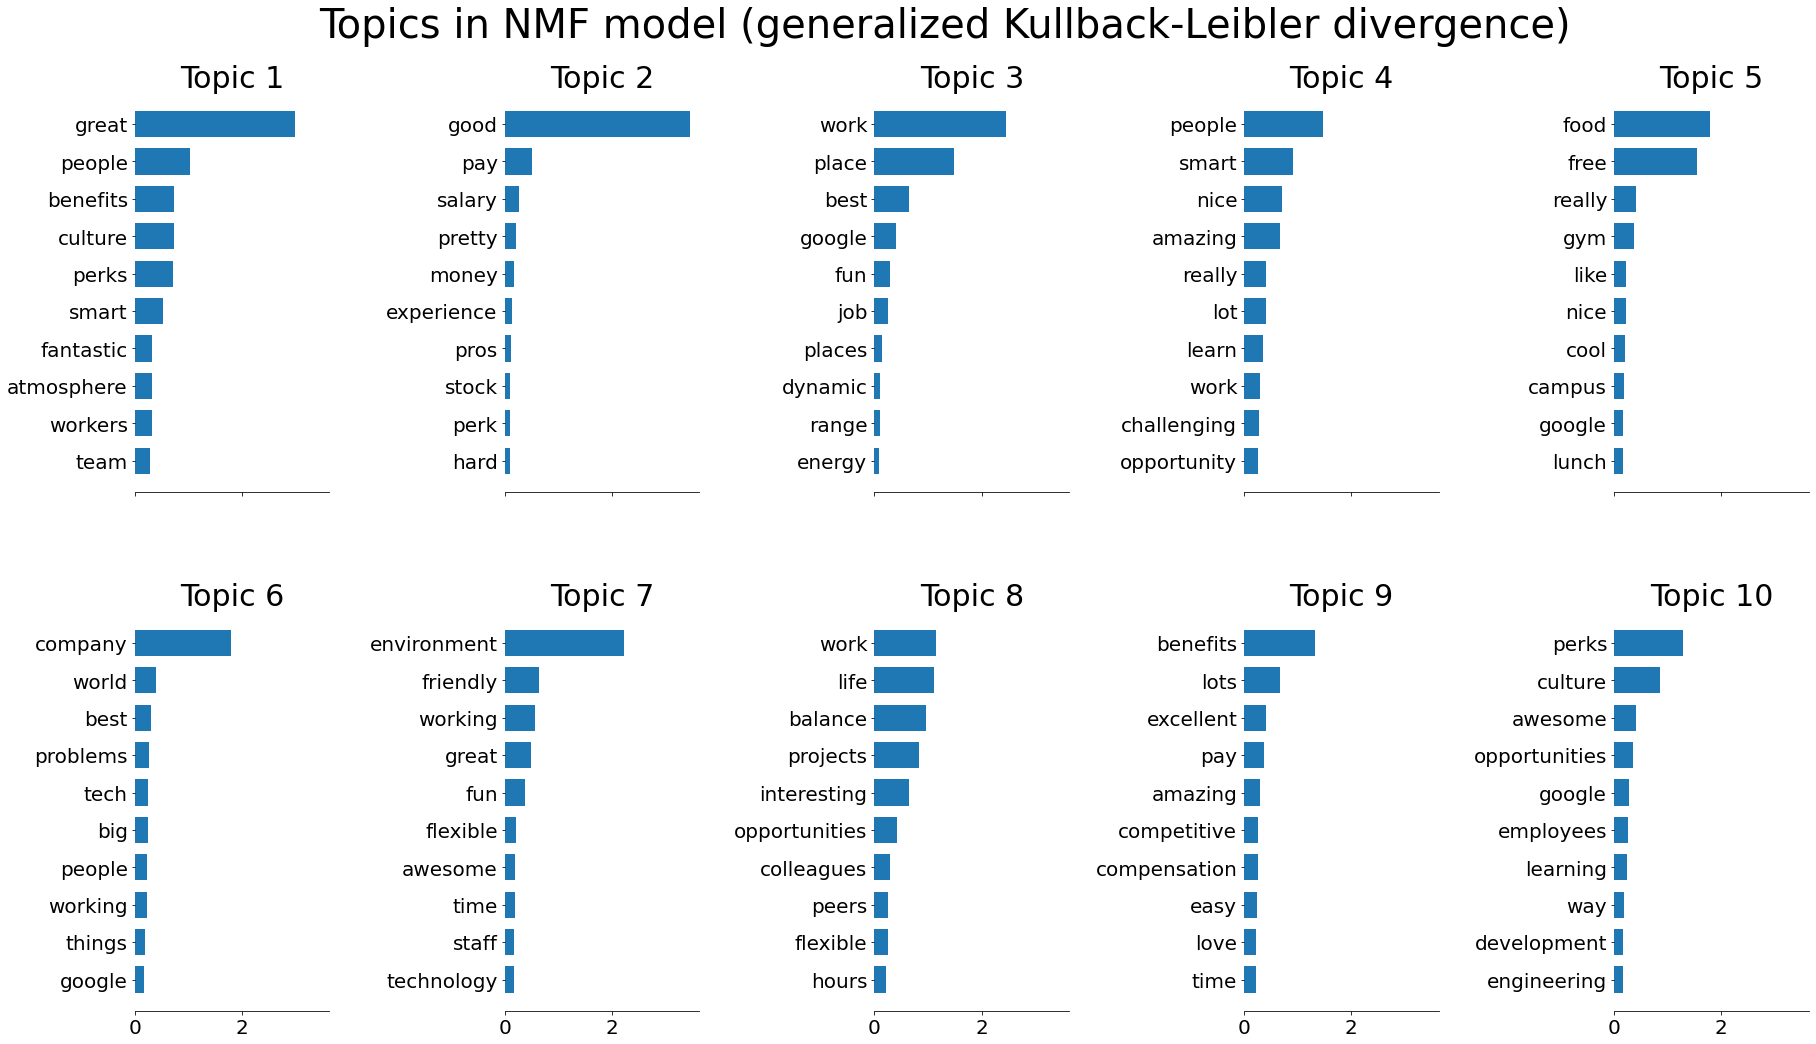

In [64]:
tfidf_feature_names = tfidf_vectorizer.get_feature_names()
plot_top_words(nmf, tfidf_feature_names, n_top_words,
               'Topics in NMF model (generalized Kullback-Leibler divergence)')

In [65]:
#tfidf_feature_names

In [66]:
lda = LatentDirichletAllocation(n_components=n_components, max_iter=5,
                                learning_method='online',
                                learning_offset=50.,
                                random_state=0)

In [67]:
lda.fit(tf)

LatentDirichletAllocation(learning_method='online', learning_offset=50.0,
                          max_iter=5, random_state=0)

['ll', 'company', 'google', 'lead', 'like', 'people', 'projects', 'open', 'actually', 'need']
['working', 'plenty', 'need', 'time', 'world', 'lead', 'flexible', 'sergey', 'like', 'engineers']
['ways', 'free', 'projects', 'flexible', 'people', 'competitive', 'working', 'cares', 'larry', 'need']
['need', 'open', 'projects', 'cares', 'ways', 'day', 'sergey', 'free', 'like', 'company']
['actually', 'world', 'll', 'need', 'having', 'projects', 'plenty', 'larry', 'speaking', 'open']
['engineers', 'having', 'day', 'food', 'sure', 'projects', 'lead', 'cares', 'actually', 'll']
['food', 'competitive', 'sergey', 'won', 'day', 'world', 'projects', 'flexible', 'speaking', 'tgif']
['people', 'sergey', 'don', 'projects', 'google', 'speaking', 'working', 'free', 'like', 'open']
['like', 'time', 'plenty', 'world', 'speaking', 'day', 'sure', 'actually', 'sergey', 'ways']
['cares', 'lead', 'google', 'actually', 'projects', 'working', 'don', 'free', 'plenty', 'larry']


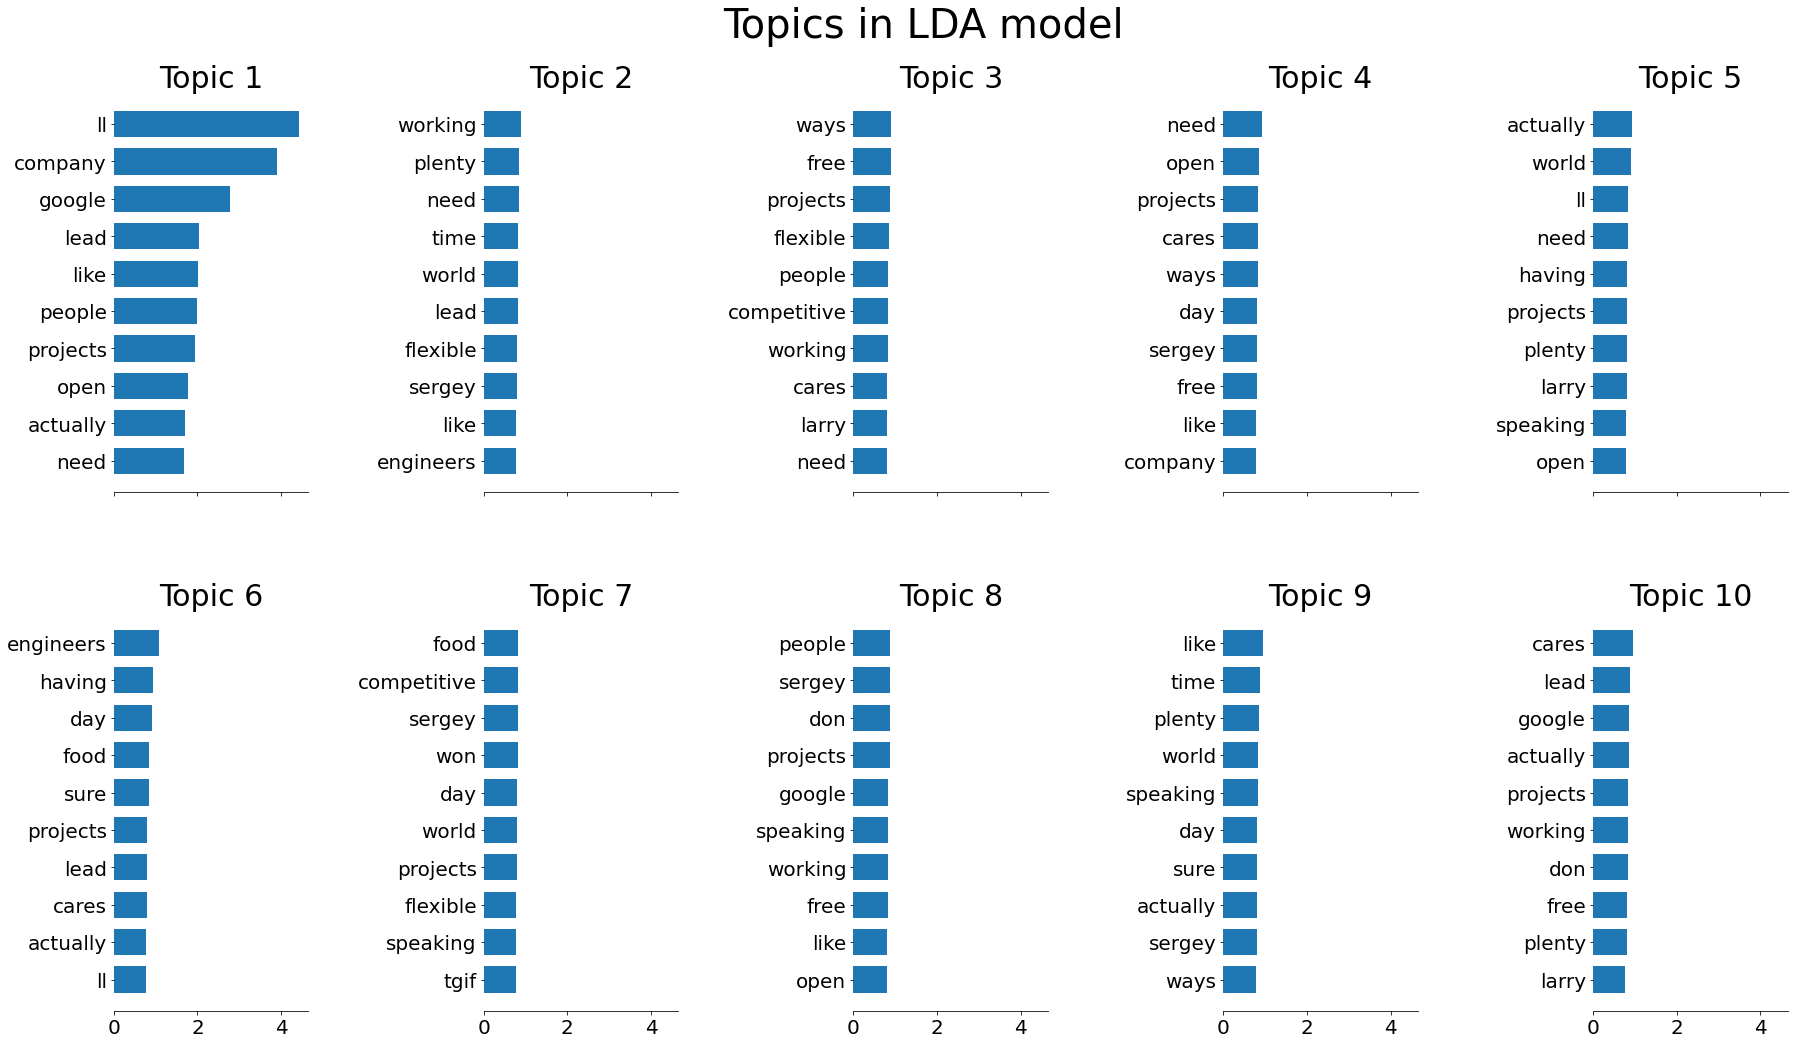

In [68]:
tf_feature_names = tf_vectorizer.get_feature_names()
plot_top_words(lda, tf_feature_names, n_top_words, 'Topics in LDA model')